# **Nama**       : **Candra Julius Sinaga**
# **EXP**        : **12.737**
# **Lokasi**     : **Sumatera Utara**
# **Bergabung**  : **Sejak 03 Januari 2020**

# **Install Data From Kaggle**

In [ ]:
!pip install -q kaggle

# **Upload Kaggle Json**

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"candrajuliussinaga","key":"f1b5e10673fde9255b882ba2af119a93"}'}

# **Make directory & Change Permission Kaggle**

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


# **Download Dataset from Kaggle**

In [ ]:
!kaggle datasets download -d hgultekin/bbcnewsarchive

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 227MB/s]


# **Ekstrak ZIP**

In [ ]:
from zipfile import ZipFile
file_name = "/content/bbcnewsarchive.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print("done extract")

done extract


# **Prepare & Load Dataset**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/bbc-news-data.csv', sep='\t')
df.head(10)

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
5,business,006.txt,Japan narrowly escapes recession,Japan's economy teetered on the brink of a te...
6,business,007.txt,Jobs growth still slow in the US,The US created fewer jobs than expected in Ja...
7,business,008.txt,India calls for fair trade rules,"India, which attends the G7 meeting of seven ..."
8,business,009.txt,Ethiopia's crop production up 24%,Ethiopia produced 14.27 million tonnes of cro...
9,business,010.txt,Court rejects $280bn tobacco case,A US government claim accusing the country's ...


# **View Columns**

In [ ]:
df.columns

Index(['category', 'filename', 'title', 'content'], dtype='object')

# **View total data -> Jumlah isi data serta category data tersebut**

In [ ]:
df.shape

(2225, 4)

# **View Category & Jumlah Data**

In [ ]:
df.category.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

# **Find Missing Value**

In [ ]:
df.isnull()

,category,filename,title,content
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2220,False,False,False,False
2221,False,False,False,False
2222,False,False,False,False
2223,False,False,False,False


# **Find Missing Values in list Dataset**

In [ ]:
df.isnull().sum()

category    0
filename    0
title       0
content     0
dtype: int64

# **View Total Number of Missing Value**

In [ ]:
df.isnull().sum().sum()

0

# **Delete Column have not been use**

In [ ]:
df_new = df.drop(columns=['filename'])
df_new

,category,title,content
0,business,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...
2220,tech,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,Be careful how you code,A new European directive could put software w...
2223,tech,US cyber security chief resigns,The man making sure US computer networks are ...


# **One Hot Encoding Before Cleansing Data**

In [ ]:
category_news = pd.get_dummies(df.category)
df_baru = pd.concat([df,category_news],axis=1)
df_baru = df_baru.drop(columns='category')
df_baru

,filename,title,content,business,entertainment,politics,sport,tech
0,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,1,0,0,0,0
1,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,1,0,0,0,0
2,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,1,0,0,0,0
3,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,1,0,0,0,0
4,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,1,0,0,0,0
...,...,...,...,...,...,...,...,...
2220,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...,0,0,0,0,1
2221,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...,0,0,0,0,1
2222,399.txt,Be careful how you code,A new European directive could put software w...,0,0,0,0,1
2223,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...,0,0,0,0,1


# **Cleansing Data**

# **Import Module & Package you need**

In [ ]:
import nltk, os, re, string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **Let Time the Cleansing**

In [ ]:
# lower-case all characters
df_new.title = df_new.title.apply(lambda x: x.lower())
df_new.content = df_new.content.apply(lambda x: x.lower())

# removing functuation
def cleaner(data):
    return(data.translate(str.maketrans('','', string.punctuation)))
    df_new.title = df_new.title.apply(lambda x: cleaner(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

## lematization
lemmatizer = WordNetLemmatizer()

def lem(data):
    pos_dict = {'N': wn.NOUN, 'V': wn.VERB, 'J': wn.ADJ, 'R': wn.ADV}
    return(' '.join([lemmatizer.lemmatize(w,pos_dict.get(t, wn.NOUN)) for w,t in nltk.pos_tag(data.split())]))
    df_new.title = df_new.title.apply(lambda x: lem(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

# removing number
def rem_numbers(data):
    return re.sub('[0-9]+','',data)
    df_new['title'].apply(rem_numbers)
    df_new['content'].apply(rem_numbers)

# removing stopword
st_words = stopwords.words()
def stopword(data):
    return(' '.join([w for w in data.split() if w not in st_words ]))
    df_new.title = df_new.title.apply(lambda x: stopword(x))
    df_new.content = df_new.content.apply(lambda x: lem(x))

# **View Data After Cleansing**

In [ ]:
df_new.head(10)

,category,title,content
0,business,ad sales boost time warner profit,quarterly profits at us media giant timewarne...
1,business,dollar gains on greenspan speech,the dollar has hit its highest level against ...
2,business,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...
3,business,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...
4,business,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...
5,business,japan narrowly escapes recession,japan's economy teetered on the brink of a te...
6,business,jobs growth still slow in the us,the us created fewer jobs than expected in ja...
7,business,india calls for fair trade rules,"india, which attends the g7 meeting of seven ..."
8,business,ethiopia's crop production up 24%,ethiopia produced 14.27 million tonnes of cro...
9,business,court rejects $280bn tobacco case,a us government claim accusing the country's ...


# **View One-Hot Encoding After Cleansing**

In [ ]:
category = pd.get_dummies(df_new.category)
df_news = pd.concat([df_new,category], axis=1)
df_news = df_news.drop(columns='category')
df_news.head(10)

,title,content,business,entertainment,politics,sport,tech
0,ad sales boost time warner profit,quarterly profits at us media giant timewarne...,1,0,0,0,0
1,dollar gains on greenspan speech,the dollar has hit its highest level against ...,1,0,0,0,0
2,yukos unit buyer faces loan claim,the owners of embattled russian oil giant yuk...,1,0,0,0,0
3,high fuel prices hit ba's profits,british airways has blamed high fuel prices f...,1,0,0,0,0
4,pernod takeover talk lifts domecq,shares in uk drinks and food firm allied dome...,1,0,0,0,0
5,japan narrowly escapes recession,japan's economy teetered on the brink of a te...,1,0,0,0,0
6,jobs growth still slow in the us,the us created fewer jobs than expected in ja...,1,0,0,0,0
7,india calls for fair trade rules,"india, which attends the g7 meeting of seven ...",1,0,0,0,0
8,ethiopia's crop production up 24%,ethiopia produced 14.27 million tonnes of cro...,1,0,0,0,0
9,court rejects $280bn tobacco case,a us government claim accusing the country's ...,1,0,0,0,0


# **Convert Data Frame To Numpy Array with Values**

In [ ]:
text_news = df_news['title'].values + '' + df_news['content'].values
lable_news = df_news[['business', 'entertainment', 'politics', 'sport', 'tech']].values


# **View Result**

In [ ]:
text_news

array(['ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76% to $1.13bn (£600m) for the three months to december, from $639m year-earlier.  the firm, which is now one of the biggest investors in google, benefited from sales of high-speed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. its profits were buoyed by one-off gains which offset a profit dip at warner bros, and less users for aol.  time warner said on friday that it now owns 8% of search-engine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aol\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sig

In [ ]:
lable_news

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

# **Split Dataset to Train & Test**

In [ ]:
from sklearn.model_selection import train_test_split
text_news_latih,text_news_test, lable_news_latih, lable_news_test = train_test_split(text_news,lable_news, test_size=0.2)

# **Let's Create Tokenizer**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='oov')
tokenizer.fit_on_texts(text_news_latih)
tokenizer.fit_on_texts(text_news_test)

sekuens_train = tokenizer.texts_to_sequences(text_news_latih)
sekuens_test = tokenizer.texts_to_sequences(text_news_test)

padded_latih = pad_sequences(sekuens_train, padding='post', maxlen=5, truncating='post')
padded_test = pad_sequences(sekuens_test, padding='post', maxlen=5, truncating='post')


# **Create Model LSTM**

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=64),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, None, 64)          320000    
                                                                 
 lstm_8 (LSTM)               (None, 128)               98816     
                                                                 
 dense_30 (Dense)            (None, 128)               16512     
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dropout_23 (Dropout)        (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)               

# **Use Callbacks**

In [ ]:
class CallcakNews(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.98 and logs.get('val_accuracy')>0.75):
      self.model.stop_training = True
      print("\n Traning sudah mencapai ambang batas 75%")
callbacks = CallcakNews()

# **Fitting Model**

In [ ]:
num_epochs = 50
history = model.fit(padded_latih,lable_news_latih,epochs=num_epochs,
                    validation_data=(padded_test,lable_news_test),verbose=1,callbacks=[callbacks])

Epoch 1/50
56/56 [==============================] - 3s 28ms/step - loss: 1.6086 - accuracy: 0.2034 - val_loss: 1.6041 - val_accuracy: 0.2360
Epoch 2/50
56/56 [==============================] - 1s 10ms/step - loss: 1.6016 - accuracy: 0.2247 - val_loss: 1.5814 - val_accuracy: 0.2899
Epoch 3/50
56/56 [==============================] - 1s 11ms/step - loss: 1.4621 - accuracy: 0.3399 - val_loss: 1.3507 - val_accuracy: 0.3663
Epoch 4/50
56/56 [==============================] - 1s 10ms/step - loss: 1.2094 - accuracy: 0.4494 - val_loss: 1.1629 - val_accuracy: 0.4966
Epoch 5/50
56/56 [==============================] - 1s 9ms/step - loss: 0.9289 - accuracy: 0.6140 - val_loss: 0.9596 - val_accuracy: 0.6562
Epoch 6/50
56/56 [==============================] - 1s 11ms/step - loss: 0.6696 - accuracy: 0.7388 - val_loss: 0.8967 - val_accuracy: 0.6697
Epoch 7/50
56/56 [==============================] - 1s 11ms/step - loss: 0.4976 - accuracy: 0.8051 - val_loss: 1.0614 - val_accuracy: 0.6809
Epoch 8/50
56/

# **Visualisasi Epoch Accuracy & Loss**

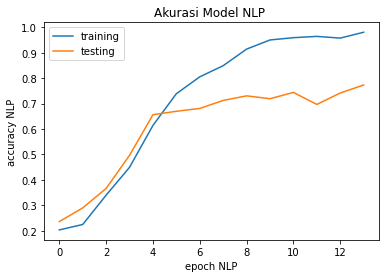

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model NLP ')
plt.ylabel('accuracy NLP')
plt.xlabel('epoch NLP')
plt.legend(['training', 'testing'], loc='upper left')
plt.show()

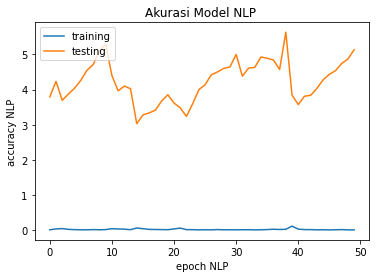

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Akurasi Model NLP ')
plt.ylabel('accuracy NLP')
plt.xlabel('epoch NLP')
plt.legend(['training', 'testing'], loc='upper left')
plt.show()